In [ ]:
import matplotlib.pyplot as plt
import sympy as sym
import numpy as np

import IPython.display as ipd
from IPython.display import Image
from IPython.display import display

from ipywidgets import interact, fixed, interact_manual
import ipywidgets as widgets

import scipy
import scipy.fftpack
from scipy.io.wavfile import write
from scipy.signal import chirp, sweep_poly
from scipy.io import wavfile

from pyknon.genmidi import Midi
from pyknon.music import NoteSeq, Note

from music21 import midi

# Trigonometrija i glazba



## Trigonometrija

Trigonometrija je grana matematike koja proučava odnose između dužina i kutova unutar trokuta. Promotrimo osnovne trigonometrijske funkcije zadane na pravokutnom trokutu.


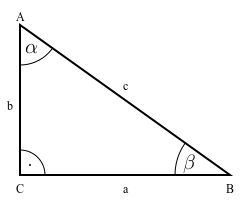

In [10]:
Image(filename="trokut.png")

Sinus:
$\sin(\alpha) = \frac{nasuprotna}{hipotenuza} = \frac{a}{c}$

Kosinus:
$\cos(\alpha) = \frac{prilezeca}{hipotenuza} = \frac{b}{c}$

Tangens:
$\tan(\alpha) = \frac{nasuportna}{prilezeca} = \frac{a}{b}$

Kotangens:
$\cot(\alpha) = \frac{prilezeca}{nasuprotna} = \frac{b}{a}$



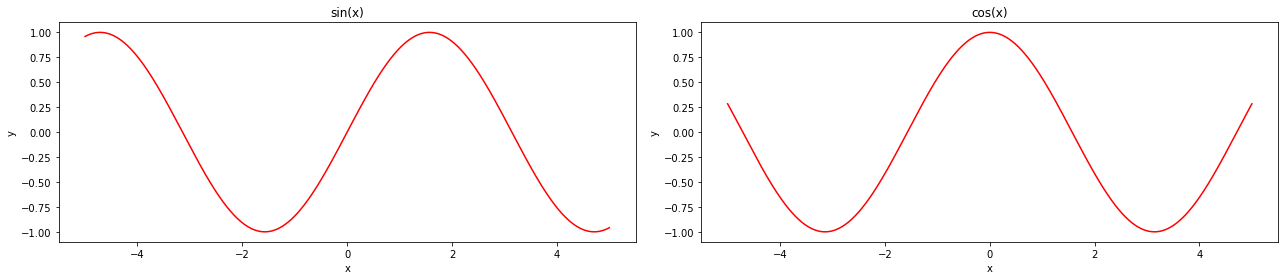

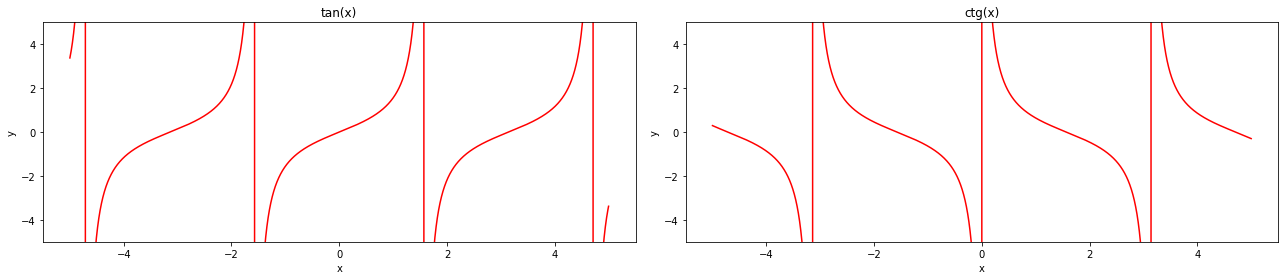

In [6]:
x = np.linspace(-5, 5,10000)
x1= -5*np.pi/2

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,4))
axes[0].plot(x, np.sin(x), 'r')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('sin(x)')
axes[1].plot(x, np.cos(x), 'r')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title('cos(x)')
fig.tight_layout()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,4))
axes[0].plot(x, np.tan(x), 'r')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('tan(x)')
axes[0].set_ylim([-5,5])
axes[1].plot(x, 1/np.tan(x) , 'r')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title('ctg(x)')
axes[1].set_ylim([-5,5])
fig.tight_layout()



Trigonometrijske funkcije na pravokutnom trokutu su zadane samo za kuteve u intervalu [0,90]. Pomoću jedinične kružnice možemo proširiti definicije za sve vrijednosti realnih brojeva


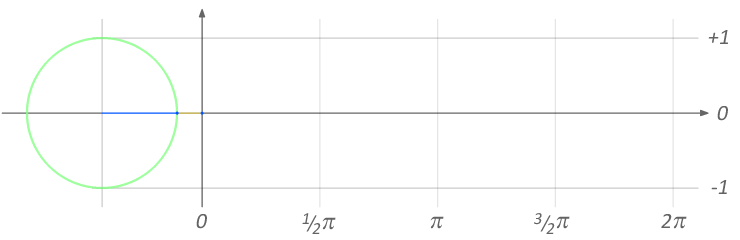

In [13]:
Image(filename="singif.gif")

In [14]:
def interaktivna_jed_kruznica_sin_cos(x):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    circ = plt.Circle((0, 0), radius=1, edgecolor='b', facecolor='None')
    ax.add_patch(circ)        
    ax.set_aspect(1)
    
    x2=np.linspace(-1,1,100)
    y2=x2*0
    ax.plot(x2,y2, 'black')
    ax.plot(y2,x2, 'black')
    
    y1=np.sin(np.deg2rad(x))
    x1=np.cos(np.deg2rad(x))
    
    plt.plot([x1, 0], [0, 0], 'b', linewidth=4, label='cos(x)')
    plt.plot([x1,x1], [y1, 0], 'g', linewidth=4, label='sin(x)')
    plt.plot([0,x1], [0,y1], 'r', linewidth=4)
    
    ax.legend(loc=2)
        
    iks = sym.Symbol('x')
    iks = x
    print('sin(x) = {}'.format(np.sin(np.deg2rad(x))))
    print('cos(x) = {}'.format(np.cos(np.deg2rad(x))))
    print('tan(x) = {}'.format(np.tan(np.deg2rad(x))))
    ax.plot()
    plt.show()
    
interact(interaktivna_jed_kruznica_sin_cos, x=(0,360, 1))



interactive(children=(IntSlider(value=180, description='x', max=360), Output()), _dom_classes=('widget-interact',))

<function __main__.interaktivna_jed_kruznica_sin_cos>

Pogledajmo graf funkcije $f(x)=A\sin(Bx+C)+D$

Broj |A| nazivamo amplitudom funkcije i ona rasteže sinusoidu po y-osi.
Broj B utječe na period funkcije f.

Temeljni period funkcije f je $\tau = \frac{2\pi}{B}$

Broj C je pomak funkcije na x-osi, a broj D je pomak na y-osi.

Iduća funkcija pokazuje utjecaj A, B, C i D u odnosu na $\sin(x)$

In [15]:
def crtaj_sinus(A, B, C, D):
    fig, ax= plt.subplots(figsize=(12,6))
    x = np.linspace(-5, 5,10000)
    ax.plot(x, A*np.sin(B*x+C)+D, 'r')
    ax.plot(x, np.sin(x), 'b')
    ax.set_ylim([-4,4])
    

interact(crtaj_sinus, A=(-4,4,0.1), B=(-4,4,0.1), C=(-4,4,0.1), D=(-4,4,0.1))

interactive(children=(FloatSlider(value=0.0, description='A', max=4.0, min=-4.0), FloatSlider(value=0.0, description='B', max=4.0, min=-4.0), FloatSlider(value=0.0, description='C', max=4.0, min=-4.0), FloatSlider(value=0.0, description='D', max=4.0, min=-4.0), Output()), _dom_classes=('widget-interact',))

<function __main__.crtaj_sinus>

## Glazba

Glazba je oblik umjetnosti čiji je medij zvuk organiziran u vremenu. Glavni elementi glazbe su:
* visina tona
    + melodija
    + harmonija
* ritam
     * tempo
     * mjera
* dinamika

Zvukove koje svakodnevno čujemo uzrokuju vibracije koje šalju valove kroz zrak. Naše uši reagiraju na te valove te šalju mozgu informacije o njihovoj amplitudi i frekvenciji koji interpretira te zvukove u zvuk.

Prosječan čovjek čuje zvuke frekvencije od 20Hz do 20000Hz
 

In [43]:
Image(filename="spektar.png")

Kromatska ljestvica je niz od 12 tonova od jedne oktave do druge. Započinje na tonu A koji iznosi 440Hz i penje se do istog tona na frekvenciji 880Hz. po pravilu $440*2^{\frac{n}{12}}$ i dobivamo redom note A, A#, H, C, C#, D, D#, E, F, F#, G, G# i A2

In [73]:

def kromatska_ljestvica(n,oktava):
    fig, ax= plt.subplots(figsize=(10,5))
    t=np.linspace(0,0.01,10000)
    ax.plot(t, np.sin(oktava*440*2**(n/12)*2*np.pi*t))
    ax.set_ylim([-2,2])
interact(kromatska_ljestvica, n=(0,12,1), oktava=(1,3,1))

sr= 22050
T=6.0
t2 = np.linspace(0, T, int(T*sr), endpoint=False)
x = np.sin(440*2**(np.round(2*t2)/12)*2*np.pi*t2)
ipd.Audio(x,rate=sr)


interactive(children=(IntSlider(value=6, description='n', max=12), IntSlider(value=2, description='oktava', max=3, min=1), Output()), _dom_classes=('widget-interact',))

Akord je istovremeno sviranje tri ili više nota odjednom. To možemo postići zajedničkim puštanjem idućih tonova (A-C#-E-A2) kojima dobivamo A-dur akord

Ton A:

In [96]:
T=5
x1 = np.sin(440*2**(0/12)*2*np.pi*t2)
ipd.Audio(x1,rate=sr)

Ton C#:

In [97]:
x2 = np.sin(440*2**(4/12)*2*np.pi*t2)
ipd.Audio(x2,rate=sr)

Ton E:

In [98]:
x3 = np.sin(440*2**(7/12)*2*np.pi*t2)
ipd.Audio(x3,rate=sr)

Ton A2:

In [99]:
x4 = np.sin(440*2**(12/12)*2*np.pi*t2)
ipd.Audio(x4,rate=sr)

(-1.5, 1.5)

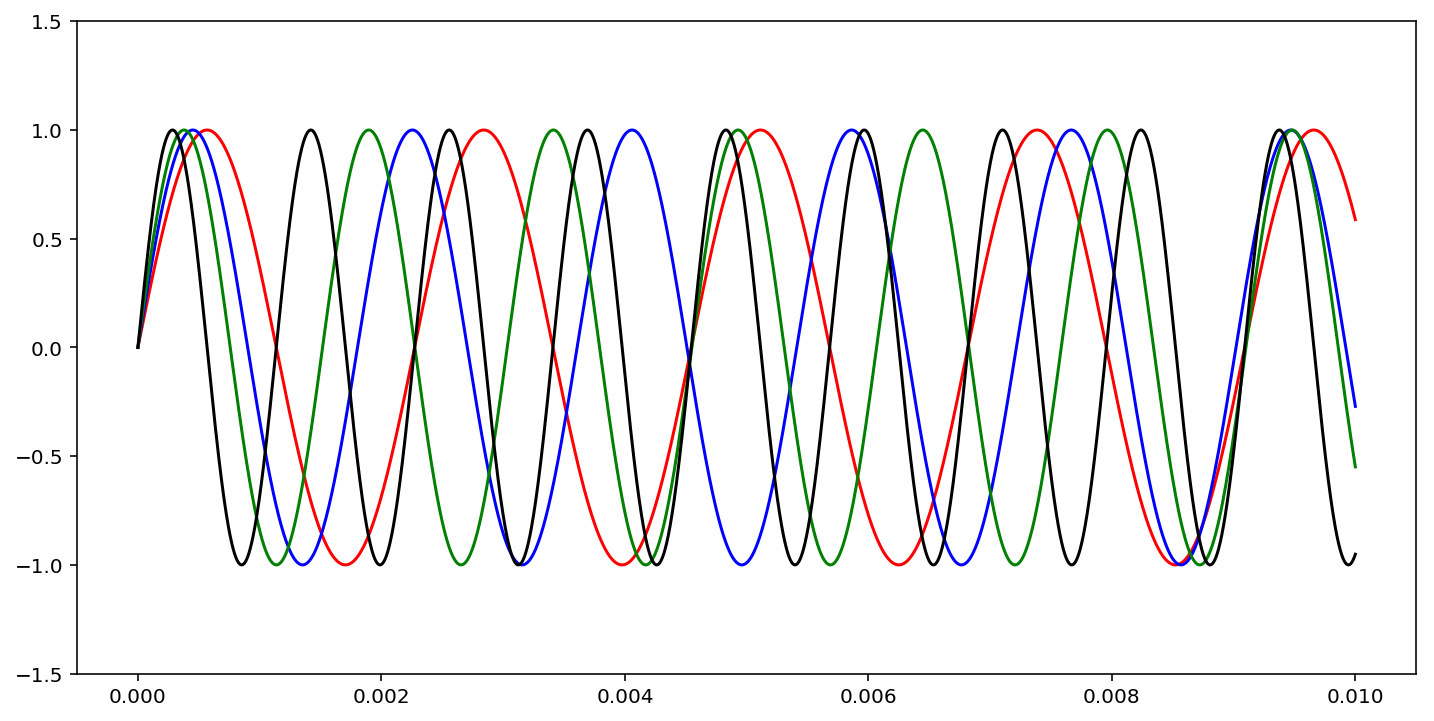

In [94]:
fig, ax= plt.subplots(figsize=(12,6))
x = np.linspace(0, 0.01,10000)
ax.plot(x, np.sin(440*2**(0/12)*2*np.pi*x) , 'r')
ax.plot(x, np.sin(440*2**(4/12)*2*np.pi*x), 'b')
ax.plot(x, np.sin(440*2**(7/12)*2*np.pi*x), 'g')
ax.plot(x, np.sin(440*2**(12/12)*2*np.pi*x), 'black')
ax.set_ylim([-1.5,1.5])

Isti akord dobijemo zbrajanjem pripadnih vrijednosti tonova, te vidimo njegov graf

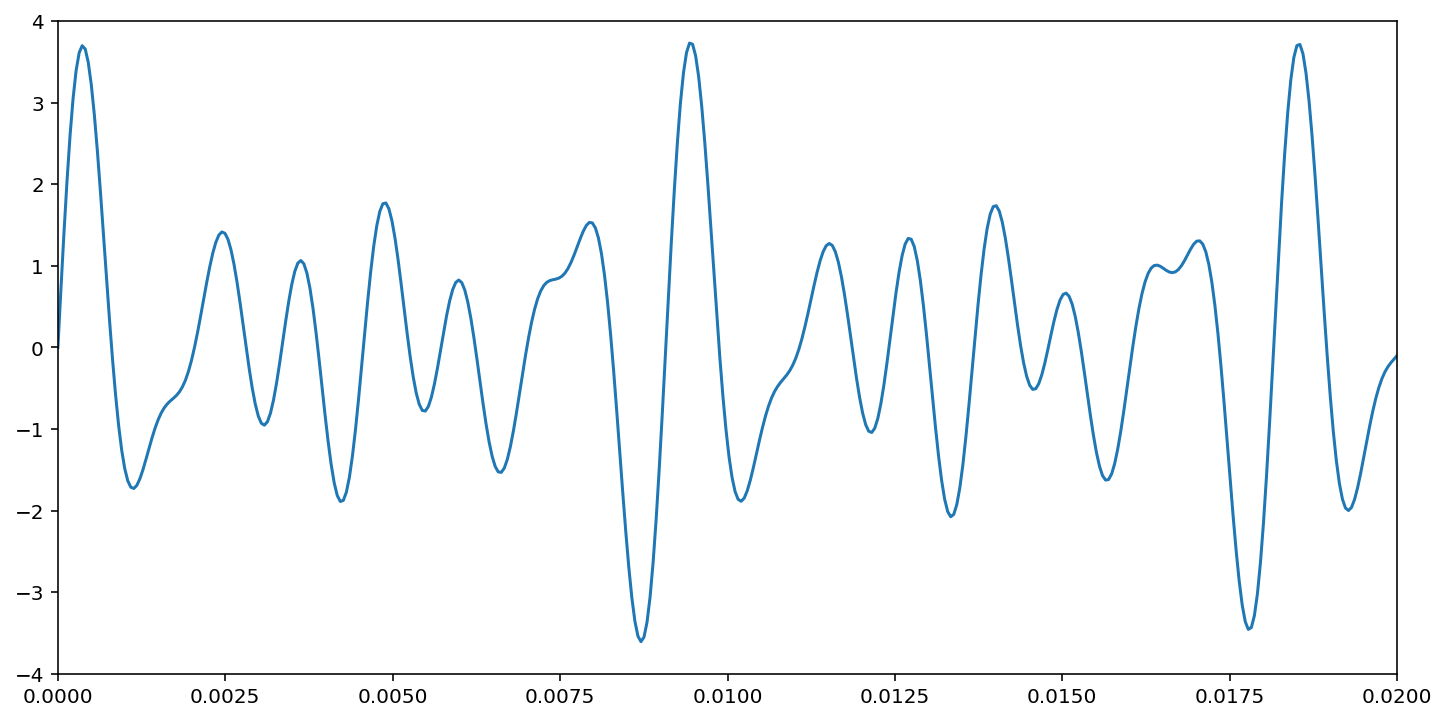

In [109]:
akord = x1 + x2 + x3 + x4
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(t2,akord)
ax.set_xlim([0,0.02])
ax.set_ylim([-4,4])
ipd.Audio(akord,rate=sr)

Isti taj akord možemo pomoću brze Fourierove transformacije (FFT) rastaviti na početne frekvencije.

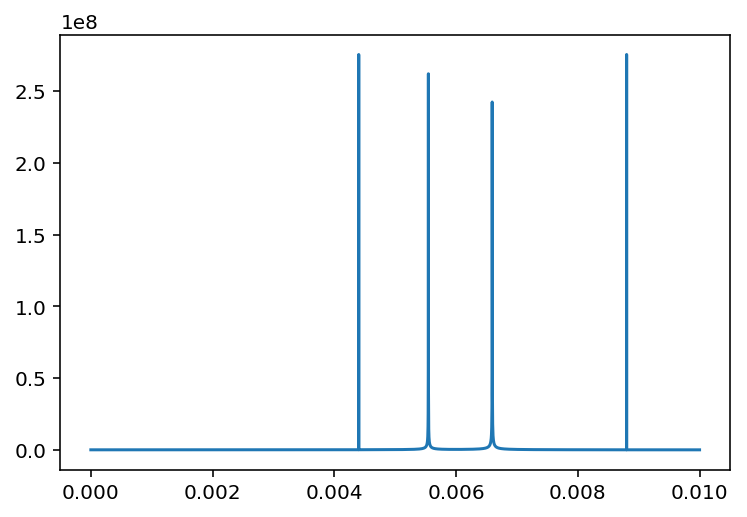

In [189]:
yf = scipy.fftpack.fft(akord)
xf = np.linspace(0.0, 0.01, 5000)

fig, ax = plt.subplots()
ax.plot(xf, 5000 * np.abs(yf[:10000//2]))
plt.show()

x = np.linspace(0, 0.01,10000)


Pokazat ćemo i ponašanje chirp zvuka. Chirp je signal čija se frekvencija povečava ili smanjuje s vremenom. Taj signal je poznat još kao sweep signal. Često se koristi u sonarima i radarima.

In [144]:
sr=44100
pocetna_frek=50.0
krajnja_frek=15000.0
trajanje=2.0
xx=np.linspace(0,trajanje,sr)

vremena= np.linspace(0.0, trajanje, trajanje*sr)
chirpdata_up=scipy.signal.chirp(vremena, pocetna_frek, trajanje, krajnja_frek)
chirpdata_down=scipy.signal.chirp(vremena, krajnja_frek, trajanje, pocetna_frek)
audio_up=np.interp(chirpdata_up,[-1.0,1.0], [-1*2**15,2**15-1]).astype(np.int16)
audio_down=np.interp(chirpdata_down,[-1.0,1.0], [-1*2**15,2**15-1]).astype(np.int16)

write('up-chirp.wav', sr, audio_up)
write('down-chirp.wav', sr, audio_down)


/home/kac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  # This is added back by InteractiveShellApp.init_path()


Up-chirp i Down-chirp

In [155]:
ipd.Audio('up-chirp.wav')

In [154]:
ipd.Audio('down-chirp.wav')

frekvencija Up-chirpa

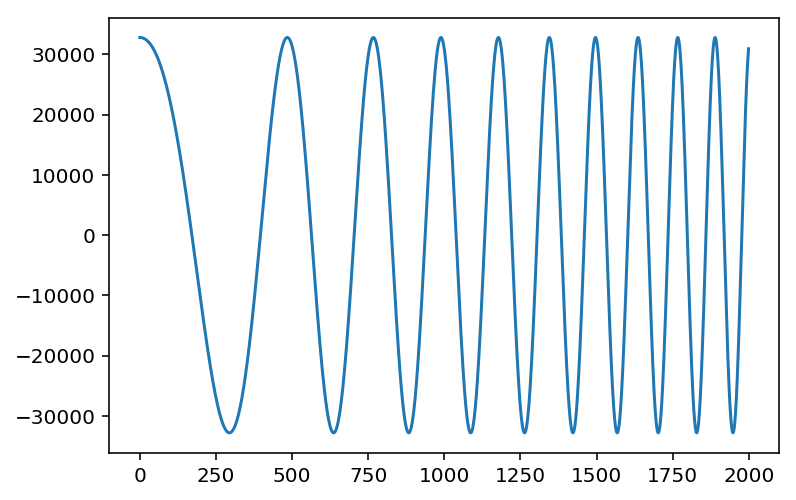

In [152]:
ipd.Audio('up-chirp.wav')
sr, data = wavfile.read('up-chirp.wav')
vremena = len(data)/float(sr)
plt.plot(data[:2000])

Danas postoji mnogo paketa za baratanje audio podacima u pythonu. Neki od njih su LibROSA za audio analizu, Mingus za skladanje (u kombinaciji sa LilyPondom omogućuje notno zapisivanje glazbe), music21 (ima mogućnost parsiranja midi filea i prebacivanja u notni zapis pomoću LilyPonda), pyknon koji je jednostavan generator midi fajlova...

In [195]:
import librosa
import librosa.display
x, sr = librosa.load('hal_9000.wav')
plt.figure(figsize=(14,5))
librosa.display.waveplot(x, sr=sr)
ipd.Audio('hal_9000.wav')

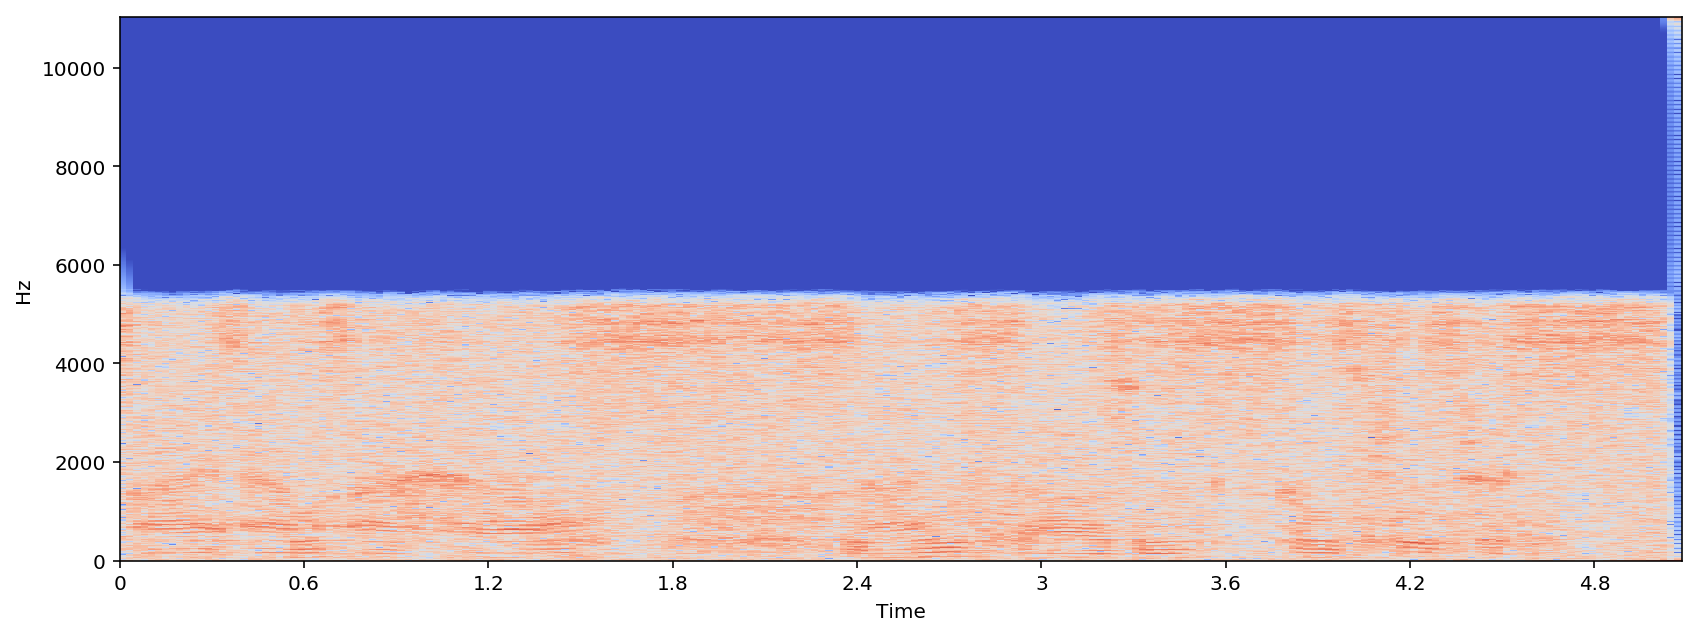

In [197]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14,5))
librosa.display.specshow(Xdb, sr=sr,x_axis='time', y_axis='hz')

In [177]:
melody = [10, 10, 10, 11, 13, 13, 11, 10, 8, 6, 6, 8 , 10, 10, 8, 8]
def makeMidi(notes, name, filename="oda_radosti.midi"):
    notes1=map(Note,notes)
    midi = Midi(1, tempo =90)
    midi.seq_notes(notes1, track =0)
    midi.write(filename)

    

def playMidi(filename):
        mf=midi.MidiFile()
        mf.open(filename)
        mf.read()
        mf.close()
        s = midi.translate.midiFileToStream(mf)
        s.show('midi')
            
    
makeMidi(melody, "melody 1")

In [200]:
playMidi("oda_radosti.midi")

Ova funkcija je u stanju i reproducirati bilo koji midi fajl, no prethodno izolira samo glavnu midi melodiju i promjeni instrument u klavir. Fajl "nova.mid" je vlastita skladba stvorena u Guitar Pro 5.2 i exportana kao midi fajl

In [199]:
playMidi("nova.mid")